<a href="https://colab.research.google.com/github/EnzoM5/Desafio_DS_LAPES_2024/blob/main/Desafio_DS_LAPES_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1090]:
import pandas as pd

In [1091]:
df = pd.read_csv("https://raw.githubusercontent.com/EnzoM5/arquivos_csv/main/startup%20data.csv")
df_original = df.copy()
df_teste = df.copy()
#df = pd.read_csv('startup_data.csv')

#Tratando Dados

In [1092]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [1093]:
def remove_columns(df, columns):
    for column in columns:
        df = df.drop(columns=column)
    return df

In [1094]:
colunas_lixo = ['id', 'Unnamed: 0', 'Unnamed: 6', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
                'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                'is_biotech', 'is_software', 'is_consulting', 'state_code.1', 'latitude', 'longitude']

df = remove_columns(df, colunas_lixo)
#usar k best

In [1095]:
df.columns

Index(['state_code', 'zip_code', 'city', 'name', 'labels', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [1096]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['state_code'] = label_encoder.fit_transform(df['state_code'])
df['category_code'] = label_encoder.fit_transform(df['category_code'])


In [1097]:
filtro_last_menor_que_primeiro = df.loc[df['age_last_milestone_year'] < df['age_first_milestone_year']]
filtro_last_menor_que_primeiro

,state_code,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status


Preenchendo valores em que 'age_last_milestone_year' é maior do que 0 enquanto 'age_first_milestone_year' não é, pois não há sentido em ter uma última conquista sem ter tido uma primeira:

In [1098]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
pd.options.mode.copy_on_write = True

In [1099]:
invalido = df.loc[
    ((df['age_first_milestone_year'] <= 0) | (df['age_first_milestone_year'].isna())) &
    ((df['age_last_milestone_year'] > 0))
]

valido = df.loc[
    (df['age_first_milestone_year'] >= 0) &
    (df['age_last_milestone_year'] >= 0) &
    (df['age_last_milestone_year'] >= df['age_first_milestone_year'])
]

features = [
    'age_first_funding_year',
    #'state_code',
    'has_VC',
    'has_angel',
    #'category_code',
    'age_last_funding_year',
]

X = valido[features]
y = valido['age_first_milestone_year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

X_invalido = invalido[features]
predictions = model.predict(X_invalido)

df.loc[invalido.index, 'age_first_milestone_year'] = np.clip(predictions, 0, invalido['age_last_milestone_year'])

#Trocar tudo por KNN INPUT

Mean Squared Error: 3.7674534728513955


In [1100]:
df.loc[(df['age_first_milestone_year'] > 0) & (df['age_last_milestone_year'].isna()), 'age_last_milestone_year'] = df['age_first_milestone_year']

In [1101]:
df[['age_first_milestone_year', 'age_last_milestone_year']].head(25)

,age_first_milestone_year,age_last_milestone_year
0,4.668500,6.7041
1,7.005500,7.0055
2,1.457500,2.2055
3,6.002700,6.0027
4,0.038400,0.0384
5,5.002700,5.0027
6,3.000000,6.6082
7,5.605500,7.3616
8,8.005500,9.9945
9,2.917800,6.1151


In [1102]:
df.astype({'age_first_funding_year': 'float64', 'age_last_funding_year': 'float64', 'age_first_milestone_year': 'float64', 'age_last_milestone_year': 'float64'}).dtypes
df.loc[df['age_first_milestone_year'] <= 0, 'age_first_milestone_year'] = None
df.loc[df['age_last_milestone_year'] <= 0, 'age_last_milestone_year'] = None

#df.astype({'age_first_milestone_year': 'object', 'age_last_milestone_year': 'object'}).dtypes
#df.fillna({'age_first_milestone_year': 0}, inplace = True)
#df.fillna({'age_last_milestone_year': 0}, inplace = True)

In [1103]:
df[['age_first_milestone_year', 'age_last_milestone_year']].head(30)

,age_first_milestone_year,age_last_milestone_year
0,4.668500,6.7041
1,7.005500,7.0055
2,1.457500,2.2055
3,6.002700,6.0027
4,0.038400,0.0384
5,5.002700,5.0027
6,3.000000,6.6082
7,5.605500,7.3616
8,8.005500,9.9945
9,2.917800,6.1151


In [1104]:
df.columns

Index(['state_code', 'zip_code', 'city', 'name', 'labels', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [1105]:
def verificar_maior_menor(df, col_maior, col_menor): #Só funciona quando todos os dados são do mesmo tipo
  filtro_last_menor_que_primeiro = df.loc[df[col_maior] < df[col_menor]]
  return filtro_last_menor_que_primeiro

In [1106]:
import unittest

In [1107]:
dataframe = df.copy()
class Teste(unittest.TestCase):

  def setUp(self):
    self.dataframe = dataframe.copy()

  def teste_verificar_maior_menor(self):
    resultado = verificar_maior_menor(self.dataframe, 'age_last_milestone_year', 'age_first_milestone_year')
    self.assertTrue(resultado.empty)

suite = unittest.TestLoader().loadTestsFromTestCase(Teste)
unittest.TextTestRunner(verbosity=2).run(suite)

teste_verificar_maior_menor (__main__.Teste) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [1108]:
df['closed_at'].head()

,closed_at
0,NaN
1,NaN
2,NaN
3,NaN
4,10/1/2012


In [1109]:
def arredondar_linhas(df, colunas):
    for coluna in colunas:
        df[coluna] = df[coluna].round(2)
    return df

In [1110]:
df = arredondar_linhas(df, ['age_first_funding_year', 'age_last_funding_year'])

In [1111]:
df[['age_first_funding_year', 'age_last_funding_year']]

,age_first_funding_year,age_last_funding_year
0,2.25,3.00
1,5.13,10.00
2,1.03,1.03
3,3.13,5.32
4,0.00,1.67
...,...,...
918,0.52,0.52
919,7.25,9.23
920,8.50,8.50
921,0.76,2.83


Identificando inconsistências entre acquired e closed_at e eliminando-as. Uma inconsistência pode ser: a empresa está com o uma data no 'closed_at', mas o status está 'acquired' e vice-versa.

In [1112]:
inconsistencies_status_null = df[(df['status'] == 'acquired') & (df['closed_at'].isna() == False)]
inconsistencies_closed_date = df[(df['status'] != 'acquired') & (df['closed_at'].isna())]
count_inconsistencies_status_null = len(inconsistencies_status_null)
count_inconsistencies_closed_date = len(inconsistencies_closed_date)

print(count_inconsistencies_status_null)
print(count_inconsistencies_closed_date)

9
0


In [1113]:
inconsistencias_status_closed_at = df.loc[(df['status'] == 'acquired') & (df['closed_at'].isna() == False)]
inconsistencias_status_closed_at


,state_code,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
73,2,94103,San Francisco,adBrite,1,1/1/2003,2/1/2001,9/1/2004,5/1/2012,1.67,9.34,7.3808,10.4740,17,4,40400000,3,0,0,c:170,0,0,1,1,1,1,1.6667,1,acquired
104,2,94110,San Francisco,Aardvark,1,7/1/2007,9/1/2011,1/1/2007,10/1/2008,-0.50,1.25,2.1726,4.6000,21,2,6000000,2,34,0,c:4622,0,1,1,0,0,0,4.0000,1,acquired
291,13,Maryland 21045,Columbia,Heartscape,1,1/1/2000,10/15/2009,4/24/2007,4/24/2007,7.32,7.32,5.0055,5.0055,6,1,16980999,1,3,0,c:20062,0,0,0,1,0,0,1.0000,1,acquired
342,29,78759,Austin,Movero Technology,1,1/1/2003,6/1/2013,6/14/2007,3/23/2010,4.45,7.23,7.0055,7.0055,5,2,5992316,1,8,0,c:44434,1,0,1,0,0,0,2.0000,0,acquired
381,2,94063,Redwood City,Grouply,1,3/1/2006,1/1/2012,6/1/2007,1/14/2008,1.25,1.87,4.7178,5.0959,13,3,2600000,2,20,1,c:975,0,1,1,0,0,0,3.6667,1,acquired
445,12,2142,Cambridge,N2N Commerce,1,1/1/2006,1/1/2008,1/3/2008,1/3/2008,2.01,2.01,NaN,NaN,1,1,30000000,1,6,0,c:1725,1,0,0,0,0,0,2.0000,1,acquired
473,2,94010,Burlingame,Brightkite,1,1/1/2007,12/1/2011,8/1/2007,7/6/2009,0.58,2.51,0.5918,4.9699,9,3,1415000,4,29,1,c:465,1,1,0,0,0,0,1.0000,1,acquired
560,2,94107,San Francisco,Dapper,1,10/1/2006,11/16/2010,12/1/2007,12/1/2007,1.17,1.17,1.9260,4.0137,19,1,3000000,4,0,0,c:1541,0,0,1,0,0,0,2.0000,1,acquired
756,2,94043,Mountain View,Clearwell Systems,1,12/6/2004,5/19/2011,4/4/2006,8/22/2007,1.33,2.71,4.3699,6.4630,6,2,29000000,3,30,0,c:3610,0,0,0,1,1,0,2.5000,1,acquired


In [1114]:
df.loc[inconsistencias_status_closed_at.index, 'status'] = 'closed'

inconsistencias_status_closed_at = df.loc[(df['status'] == 'acquired') & (df['closed_at'].isna() == False)]
inconsistencias_status_closed_at

,state_code,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status


#Exploração

In [1115]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1116]:
def desvio_medio(serie):
    return (serie - serie.mean()).abs().mean()


Tabela com informações do gráfico acima

No gráfico abaixo, é possível observar que as empresas com investidores anjo que fecharam é proporcionalmente quase duas vezes maior do que as sem investidores anjo. Apesar de essa estatística parecer estranha, ela faz sentido quando consideramos que startups que crescem muito rápido nem sempre conseguem aumentar o nível de vendas na mesma proporção, causando defícits financeiros maiores do que se tivessem recebido menos investimento, acarretando na falência da empresa.

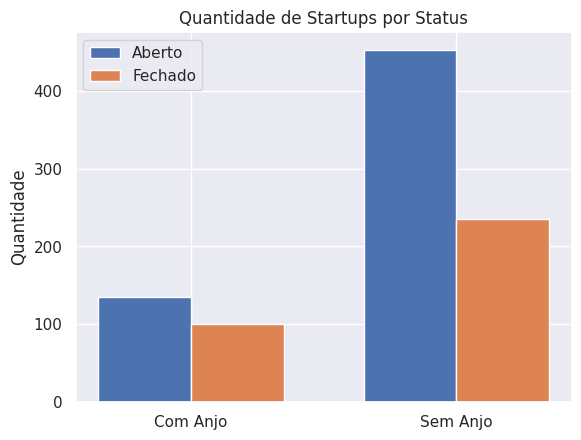

In [1117]:
df_com_anjo = df.loc[df['has_angel'] == True]
df_sem_anjo = df.loc[df['has_angel'] == False]

qtd_df_com_anjo = len(df_com_anjo)
qtd_df_sem_anjo = len(df_sem_anjo)

df_com_anjo_aberto = df_com_anjo[df_com_anjo['status'] == 'acquired']
df_sem_anjo_aberto = df_sem_anjo[df_sem_anjo['status'] == 'acquired']
df_com_anjo_fechado = df_com_anjo[df_com_anjo['status'] == 'closed']
df_sem_anjo_fechado = df_sem_anjo[df_sem_anjo['status'] == 'closed']

fig, ax = plt.subplots()
labels = ['Com Anjo', 'Sem Anjo']

aberto = [len(df_com_anjo_aberto), len(df_sem_anjo_aberto)]
fechado = [len(df_com_anjo_fechado), len(df_sem_anjo_fechado)]

width = 0.35
x = np.arange(len(labels))

barras_aberto = ax.bar(x - width/2, aberto, width, label='Aberto')
barras_fechado = ax.bar(x + width/2, fechado, width, label='Fechado')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Startups por Status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

No gráfico abaixo, observa-se que as categorias de empresas mais comuns são as de categoria 30 (software), 34 (web), 18 (mobile), 8 (enterprise) e 0 (advertising).

Todas as 5 ou são da área de tecnologia ou da área de negócios e vendas, mostrando que são as áreas mais fortes no mercado de startups e possuem diversas oportunidades, mas também enfrentam uma grande concorrência.

Esse é o oposto do que acontece com as empresas de categoria 31 (sports) e 14 (hospitality), que apesar de serem áreas que tem bastante dinheiro involvido, já estão extremamente consolidadas e é muito difícil entrar nesses ramos e competir com as grandes empresas que dominam o mercado.

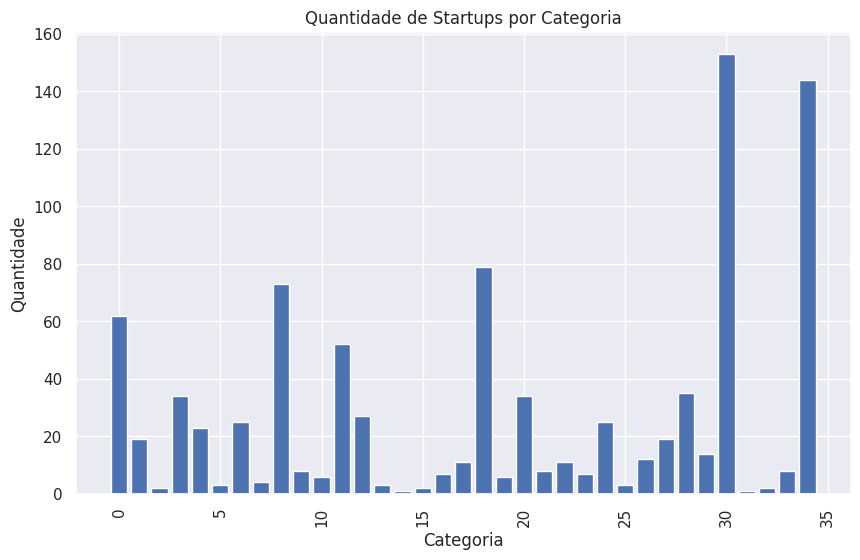

In [1118]:
top_500 = df[df['is_top500'] == True]
quantidade_top_500_por_categoria = top_500.groupby('category_code').size().reset_index(name='count')
categorias = df.groupby('category_code').size().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(categorias['category_code'], categorias[0])
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Quantidade de Startups por Categoria')
plt.xticks(rotation=90)

plt.show()

No gráfico abaixo, percebe-se que algumas categorias estão perfeitamente balanceadas no que se trata à idade em que as empresas alcançaram sua primeira grande conquista, a exemplo da categoria 5 (consulting) e 32 (transportation). Isso se deve porque essas categorias tem muitos poucos dados, as duas possuem apenas 2 entradas, não sendo o suficiente para gerar uma dispersão nos dados.

Já as categorias 8 (enterprise), 30 (software) e 34 (web), por exemplo, possuem uma distribuição maior de idade. Há um destaque maior para a categoria 30, que possui a maior parte das empresas com uma média próxima de 4 a 5, mas possui uma distribuição considerável entre 7 e 12 anos, além de ter um grande outlier que só alcançou sua primeira grande conquista aos 25 anos de existência.

Portanto, é seguro dizer que as categorias mais populares são muito mais distribuidas no que se refere a idade em que cada empresa atinge outros patamares, pois além de ter mais exemplos de casos reais, são mais modernas, dinâmicas e arriscadas.

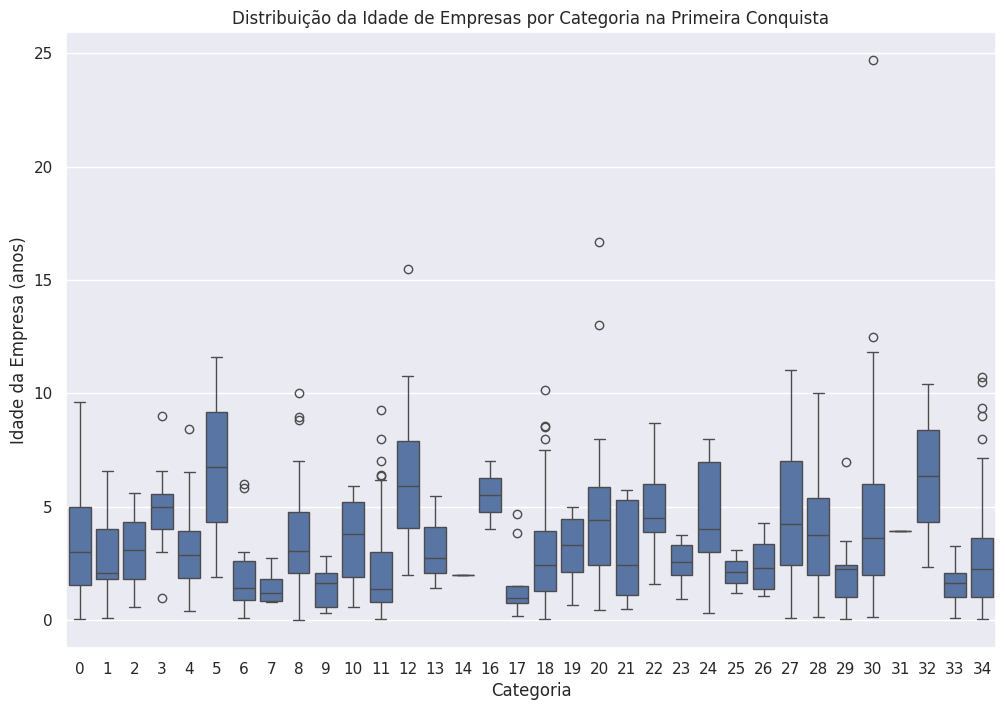

In [1119]:
df_sem_na = df.dropna(subset=['age_first_milestone_year', 'age_last_milestone_year'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='category_code', y='age_first_milestone_year', data=df_sem_na)

plt.title('Distribuição da Idade de Empresas por Categoria na Primeira Conquista')
plt.xlabel('Categoria')
plt.ylabel('Idade da Empresa (anos)')

plt.show()

In [1120]:
print(df_sem_na.loc[df_sem_na['category_code'] == 32])
print(df_sem_na.loc[df_sem_na['category_code'] == 5])

     state_code zip_code        city    name  labels  founded_at closed_at first_funding_at last_funding_at  age_first_funding_year  age_last_funding_year  age_first_milestone_year  age_last_milestone_year  relationships  funding_rounds  funding_total_usd  milestones  category_code  is_othercategory object_id  has_VC  has_angel  has_roundA  has_roundB  has_roundC  has_roundD  avg_participants  is_top500    status
322           7    30309  NW Atlanta  Zipcar       1  10/31/2000       NaN       12/20/2002      12/15/2010                    2.14                  10.13                   10.4164                  12.1863             35               4           60704370           3             32                 1   c:23756       1          0           0           1           0           1            2.0000          1  acquired
812           2    94301   Palo Alto    Waze       1    1/1/2007       NaN         3/1/2008      10/18/2011                    1.16                   4.80            